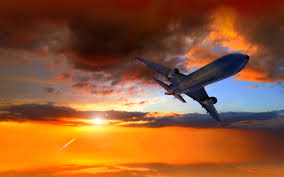

In [3]:
from IPython.display import Image, display
display(Image(filename="data/plane.jpeg", width= 700))

## Final Project Submission 
* Author: Valary Kones
* Student pace: full time hybrid
* Instructor name: Samuel Karu



---

## Project Overview

For this project I will use data about aviation accidents from 1962-2023 to generate insights for my client, a company that is trying to break into the aviation industry. I will use data cleaning, analysis and visualization to support my insights and generate 3 recommendations for this company. 

## Business Problem

My company is thinking of expanding into the aviation industry and is  interested in purchasing and operating airplanes for commercial and private enterprises. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.
To do this  I plan to answer the following data questions:
1. What is the distribution of accidents by aircraft type
2. What was the survival rate for each aircraft and which had the highest survival rate(less fatalities)
3. Which planes are sturdier, where aircraft damage wasn't total and complete

I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

---

## Data Understanding

The data provided is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

This data has 30 columns, showing the date,year, location, aircraft make, model and number of fatalities etc., of each accident during this time period. I will be interested in the information about the number of fatalities,and aircraft types as this will help me answer my data questions.
I will fill in any missing values i feel i need.


# Importing Necessary Libraries

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Loading the Data
I want to get a preliminary look at out data set.

In [3]:
df = pd.read_csv("./data/Aviation_Data.csv")

df.head()

c:\Users\valar\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [53]:
df.shape

(90348, 31)

In [55]:
df["Air.carrier"].value_counts()

Pilot                                         258
American Airlines                              90
United Airlines                                89
Delta Air Lines                                53
SOUTHWEST AIRLINES CO                          42
                                             ... 
BIK AIR LLC                                     1
Delaney Family Trust                            1
Colgan Air Inc (dba: U.s. Airways Express)      1
Pending                                         1
Aero-klub "Sveti Ilija                          1
Name: Air.carrier, Length: 13590, dtype: int64

As we can see, our data frame has 31 columns and 90,348 rows. That is alot of information. However we see that it also has some missing values in most of the columns. We are going to do some Data cleaning.

## Data Cleaning with Pandas.

First we are going to drop columns we don't need or those that have too many missing values to be worth it.Most of these columns are either identifiers (accident number and event id) that we don't need. 

I am going to drop:
1. Schedule - because it has too many missing values
2. Far description - I dont think I will need this
3. Report Status
4. Air Carrier - too many missing values and it is not relevant to my analysis
5. Event.Id                
6. Investigation.Type      
7. Accident.Number
8. Publication date 
9. Airport name
10. Airport code  
11. Registration number       
          